In [1]:
# Imports
import matplotlib
import pandas as pd
import os

from os.path import join

%matplotlib inline

In [2]:
# find total number of images
!find Images -type f | grep -v ".DS_Store" | wc -l

   48398


In [3]:
# find total number of subjects
!ls -l Images/ | grep -v "total 0" | wc -l

      25


In [8]:
# load subjects and associated PSPI (Pain Intensity Scores) into pandas dataframe for further analysis
images = []
pspi_scores = []

for subject_id in os.listdir('Images'):
    if subject_id != '.DS_Store':
        for sequence_id in os.listdir(join('Images', subject_id)):
            if sequence_id != '.DS_Store':
                for image in os.listdir(join('Images', subject_id, sequence_id)):
                    if image != '.DS_Store':
                        images.append(image.split('.')[0])
                for pspi_file in os.listdir(join('Frame_Labels', 'PSPI', subject_id, sequence_id)):
                    with open(join('Frame_Labels', 'PSPI', subject_id, sequence_id, pspi_file), 'r') as f_in:
                        pspi_scores.append(float(f_in.read().strip()))

data = {'image': images, 'pspi_score': pspi_scores}
df = pd.DataFrame(data=data)

In [5]:
print len(images)
print len(pspi_scores)

print images[:10]
print pspi_scores[:10]

48398
48398
['ll042t1aaaff001', 'll042t1aaaff002', 'll042t1aaaff003', 'll042t1aaaff004', 'll042t1aaaff005', 'll042t1aaaff006', 'll042t1aaaff007', 'll042t1aaaff008', 'll042t1aaaff009', 'll042t1aaaff010']
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


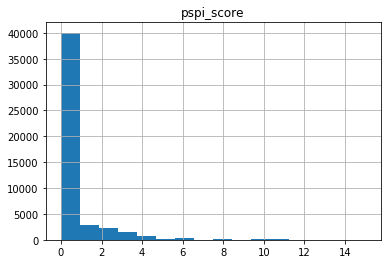

In [9]:
# Examine PSPI Score distribution across images
df2 = pd.DataFrame({
         'pspi_score': pspi_scores
         }, index=images)
hist = df2.hist(bins=16)

In [13]:
df2.describe()

,pspi_score
count,48398.000000
mean,0.446981
std,1.302021
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,15.000000


In [12]:
# From the above, we can see that most of the PSPI scores seem to be 0
# We can validate this by explicitly getting the % of non-zero scores from the dataset
print float(len(df[df['pspi_score'] > 0.0])) / float(len(df)) * 100

17.292036861
